# Mobile Net For Image Classification

In [1]:
from utils.model import *
import tensorflow as tf
from keras.optimizers import SGD, RMSprop, Adam, Nadam
import matplotlib.pyplot as plt

## 1. MobileNet

### I. $\alpha = 1$ 

In [2]:
#Load data from the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension28
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [7]:
model = mobilenet(x_train.shape[1:],10, alpha = 1)
model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, validation_split=0.2, 
                    epochs=10, 
                    verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 228s 148ms/step - loss: 0.8063 - accuracy: 0.7289 - val_loss: 1.7194 - val_accuracy: 0.7513
Epoch 2/10
1500/1500 [==============================] - 216s 144ms/step - loss: 0.4837 - accuracy: 0.8418 - val_loss: 0.4166 - val_accuracy: 0.8618
Epoch 3/10
1500/1500 [==============================] - 215s 143ms/step - loss: 0.4341 - accuracy: 0.8675 - val_loss: 0.3474 - val_accuracy: 0.8799
Epoch 4/10
1500/1500 [==============================] - 220s 146ms/step - loss: 0.3781 - accuracy: 0.8781 - val_loss: 0.6125 - val_accuracy: 0.8553
Epoch 5/10
1500/1500 [==============================] - 221s 147ms/step - loss: 0.3573 - accuracy: 0.8889 - val_loss: 1.2373 - val_accuracy: 0.8689
Epoch 6/10
1500/1500 [==============================] - 221s 147ms/step - loss: 0.3288 - accuracy: 0.8948 - val_loss: 2.4177 - val_accuracy: 0.8471
Epoch 7/10
1500/1500 [==============================] - 221s 147ms/step - loss: 0.3158 - accuracy: 0.9024 - val_

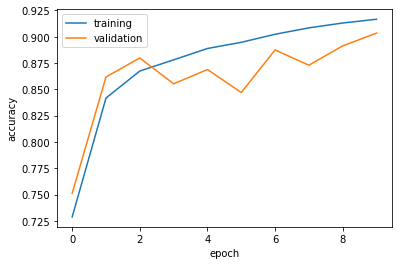

In [10]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

### II. $\alpha = 0.75$ 

In [11]:
model = mobilenet(x_train.shape[1:],10, alpha = 0.75)
model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, validation_split=0.2, 
                    epochs=10, 
                    verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 226s 146ms/step - loss: 0.8388 - accuracy: 0.7207 - val_loss: 1.4429 - val_accuracy: 0.7944
Epoch 2/10
1500/1500 [==============================] - 218s 145ms/step - loss: 0.5259 - accuracy: 0.8266 - val_loss: 0.7282 - val_accuracy: 0.8207
Epoch 3/10
1500/1500 [==============================] - 220s 147ms/step - loss: 0.4591 - accuracy: 0.8564 - val_loss: 0.4369 - val_accuracy: 0.8477
Epoch 4/10
1500/1500 [==============================] - 219s 146ms/step - loss: 0.4148 - accuracy: 0.8692 - val_loss: 0.9027 - val_accuracy: 0.8258
Epoch 5/10
1500/1500 [==============================] - 220s 146ms/step - loss: 0.3740 - accuracy: 0.8781 - val_loss: 0.4260 - val_accuracy: 0.8662
Epoch 6/10
1500/1500 [==============================] - 217s 145ms/step - loss: 0.3533 - accuracy: 0.8865 - val_loss: 0.3766 - val_accuracy: 0.8832
Epoch 7/10
1500/1500 [==============================] - 211s 141ms/step - loss: 0.3387 - accuracy: 0.8918 - val_

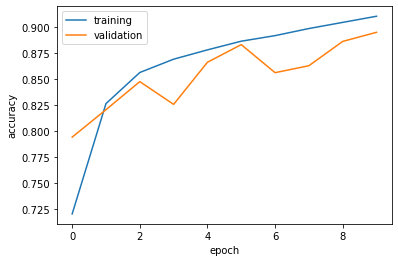

In [12]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

### III. $\alpha = 0.5$ 

In [3]:
model = mobilenet(x_train.shape[1:],10, alpha = 0.5)
model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, validation_split=0.2, 
                    epochs=10, 
                    verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 176s 115ms/step - loss: 2.3663 - accuracy: 0.1076 - val_loss: 1562.0995 - val_accuracy: 0.0983
Epoch 2/10
1500/1500 [==============================] - 178s 119ms/step - loss: 2.2981 - accuracy: 0.1092 - val_loss: 2471.1973 - val_accuracy: 0.0983
Epoch 3/10
1500/1500 [==============================] - 176s 118ms/step - loss: 2.2893 - accuracy: 0.1097 - val_loss: 2934.9309 - val_accuracy: 0.1030
Epoch 4/10
1500/1500 [==============================] - 174s 116ms/step - loss: 2.3133 - accuracy: 0.1114 - val_loss: 3495.2766 - val_accuracy: 0.0959
Epoch 5/10
1500/1500 [==============================] - 173s 115ms/step - loss: 2.3028 - accuracy: 0.1135 - val_loss: 2230.0518 - val_accuracy: 0.0983
Epoch 6/10
1500/1500 [==============================] - 175s 117ms/step - loss: 2.3006 - accuracy: 0.1101 - val_loss: 4990.5210 - val_accuracy: 0.0983
Epoch 7/10
1500/1500 [==============================] - 176s 117ms/step - loss: 2.2866 - accur

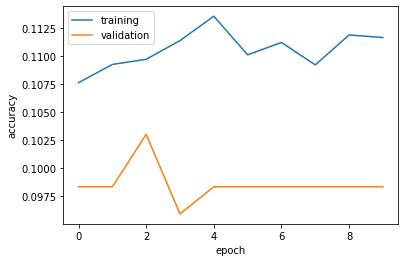

In [4]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

In [11]:
model = mobilenet(x_train.shape[1:],10, alpha = 0.5)
model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, validation_split=0.2, 
                    epochs=10, 
                    verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 181s 118ms/step - loss: 2.3818 - accuracy: 0.1087 - val_loss: 469.8445 - val_accuracy: 0.0983
Epoch 2/10
1500/1500 [==============================] - 179s 119ms/step - loss: 2.3286 - accuracy: 0.1094 - val_loss: 934.5204 - val_accuracy: 0.0983
Epoch 3/10
1500/1500 [==============================] - 171s 114ms/step - loss: 2.2995 - accuracy: 0.1124 - val_loss: 9960.4756 - val_accuracy: 0.0983
Epoch 4/10
1500/1500 [==============================] - 172s 115ms/step - loss: 2.3146 - accuracy: 0.1117 - val_loss: 1797.4169 - val_accuracy: 0.0957
Epoch 5/10
1500/1500 [==============================] - 176s 117ms/step - loss: 2.3010 - accuracy: 0.1117 - val_loss: 7476.9253 - val_accuracy: 0.0983
Epoch 6/10
1500/1500 [==============================] - 175s 116ms/step - loss: 2.2868 - accuracy: 0.1102 - val_loss: 3237.9260 - val_accuracy: 0.0983
Epoch 7/10
1500/1500 [==============================] - 175s 117ms/step - loss: 2.3076 - accurac

## 2. Standard Convolution 

In [13]:
model = CNN(x_train.shape[1:],10)
model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, validation_split=0.2, 
                    epochs=10, 
                    verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 3388s 2s/step - loss: 1.0371 - accuracy: 0.6119 - val_loss: 1.4692 - val_accuracy: 0.6204
Epoch 2/10
1500/1500 [==============================] - 3295s 2s/step - loss: 0.6295 - accuracy: 0.7981 - val_loss: 0.9327 - val_accuracy: 0.7584
Epoch 3/10
1500/1500 [==============================] - 3291s 2s/step - loss: 0.4906 - accuracy: 0.8490 - val_loss: 0.3758 - val_accuracy: 0.8655
Epoch 4/10
1500/1500 [==============================] - 3273s 2s/step - loss: 0.4267 - accuracy: 0.8716 - val_loss: 0.3580 - val_accuracy: 0.8854
Epoch 5/10
1500/1500 [==============================] - 3289s 2s/step - loss: 0.3838 - accuracy: 0.8851 - val_loss: 0.3282 - val_accuracy: 0.8952
Epoch 6/10
1500/1500 [==============================] - 3300s 2s/step - loss: 0.3544 - accuracy: 0.8929 - val_loss: 0.3000 - val_accuracy: 0.9005
Epoch 7/10
1500/1500 [==============================] - 3298s 2s/step - loss: 0.3280 - accuracy: 0.9026 - val_loss: 0.3023 -

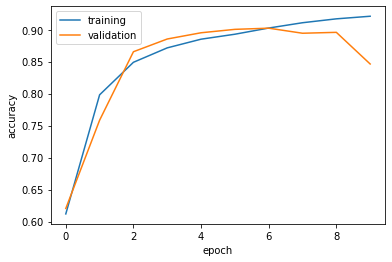

In [14]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()